## Coffee Shop Project

In [6]:
!pip install mysql-connector
!pip install --upgrade mysql-connector-python
!pip install pandas
!pip install matplotlib

  Using cached mysql_connector-2.2.9-cp312-cp312-win_amd64.whl
  Using cached mysql_connector_python-9.1.0-cp312-cp312-win_amd64.whl.metadata (6.2 kB)
Using cached mysql_connector_python-9.1.0-cp312-cp312-win_amd64.whl (16.1 MB)


In [82]:
import mysql.connector

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [84]:
db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "sql1426",
    database = "Coffee_Shop",
    auth_plugin = "mysql_native_password",
    use_pure = True
)
mycursor = db.cursor()
print(db)

In [85]:
mycursor.execute('select * from products')

output = mycursor.fetchall()

for x in output:
    print(x)

(1, 'COF0001', 'Macchiato', Decimal('317.45'), 186, 'Mint', 'Cold', 'Medium', 332, 'Spices, Sugar', 1, Decimal('3.0'))
(2, 'COF0002', 'Frappuccino', Decimal('60.35'), 172, 'Hazelnut', 'Iced', 'Large', 483, 'Chocolate, Spices, Coffee Beans, Sugar, Tea Leaves', 0, Decimal('3.5'))
(3, 'COF0003', 'Iced Latte', Decimal('216.77'), 26, 'Cinnamon', 'Iced', 'Small', 485, 'Ice, Sugar, Chocolate, Milk, Tea Leaves', 1, Decimal('3.5'))
(4, 'COF0004', 'Latte', Decimal('289.52'), 21, 'None', 'Hot', 'Small', 418, 'Milk, Tea Leaves', 0, Decimal('3.7'))
(5, 'COF0005', 'Latte', Decimal('171.15'), 84, 'None', 'Iced', 'Small', 336, 'Coffee Beans, Tea Leaves, Ice, Milk, Chocolate', 0, Decimal('2.3'))
(6, 'COF0006', 'Frappuccino', Decimal('378.72'), 158, 'Cinnamon', 'Iced', 'Medium', 221, 'Spices, Coffee Beans', 1, Decimal('4.7'))
(7, 'COF0007', 'Mocha', Decimal('491.30'), 116, 'Hazelnut', 'Iced', 'Medium', 120, 'Ice, Cream', 0, Decimal('2.5'))
(8, 'COF0008', 'Masala Chai', Decimal('270.07'), 65, 'Cardamom',

In [86]:
query = "select * from products"
data = pd.read_sql(query, db)

In [87]:
data.head(10)

,id,product_id,product_name,price,quantity,flavors,category,size,calories,ingredients,availability,rating
0,1,COF0001,Macchiato,317.45,186,Mint,Cold,Medium,332,"Spices, Sugar",1,3.0
1,2,COF0002,Frappuccino,60.35,172,Hazelnut,Iced,Large,483,"Chocolate, Spices, Coffee Beans, Sugar, Tea Le...",0,3.5
2,3,COF0003,Iced Latte,216.77,26,Cinnamon,Iced,Small,485,"Ice, Sugar, Chocolate, Milk, Tea Leaves",1,3.5
3,4,COF0004,Latte,289.52,21,None,Hot,Small,418,"Milk, Tea Leaves",0,3.7
4,5,COF0005,Latte,171.15,84,None,Iced,Small,336,"Coffee Beans, Tea Leaves, Ice, Milk, Chocolate",0,2.3
5,6,COF0006,Frappuccino,378.72,158,Cinnamon,Iced,Medium,221,"Spices, Coffee Beans",1,4.7
6,7,COF0007,Mocha,491.30,116,Hazelnut,Iced,Medium,120,"Ice, Cream",0,2.5
7,8,COF0008,Masala Chai,270.07,65,Cardamom,Iced,Small,330,"Sugar, Cream, Chocolate, Coffee Beans",0,1.0
8,9,COF0009,Iced Latte,134.14,192,Vanilla,Hot,Small,484,"Milk, Ice, Sugar",1,1.2
9,10,COF0010,Mocha,126.03,178,Caramel,Cold,Small,269,"Cream, Chocolate, Tea Leaves, Ice, Coffee Beans",1,1.9


## 1. Which products are available in each category?

In [88]:
data["category"].value_counts()

category
Hot        525
Cold       503
Blended    494
Iced       478
Name: count, dtype: int64

In [89]:
data.groupby("category")["product_name"].value_counts()

category  product_name
Blended   Iced Latte      71
          Americano       53
          Frappuccino     52
          Masala Chai     50
          Latte           49
          Espresso        46
          Mocha           46
          Choco Frappe    44
          Macchiato       44
          Cappuccino      39
Cold      Americano       54
          Frappuccino     54
          Latte           54
          Cappuccino      50
          Choco Frappe    50
          Iced Latte      50
          Espresso        49
          Macchiato       48
          Masala Chai     47
          Mocha           47
Hot       Macchiato       70
          Masala Chai     61
          Iced Latte      57
          Espresso        56
          Mocha           52
          Latte           51
          Americano       47
          Frappuccino     45
          Choco Frappe    44
          Cappuccino      42
Iced      Americano       63
          Macchiato       55
          Espresso        51
          Cappuccino

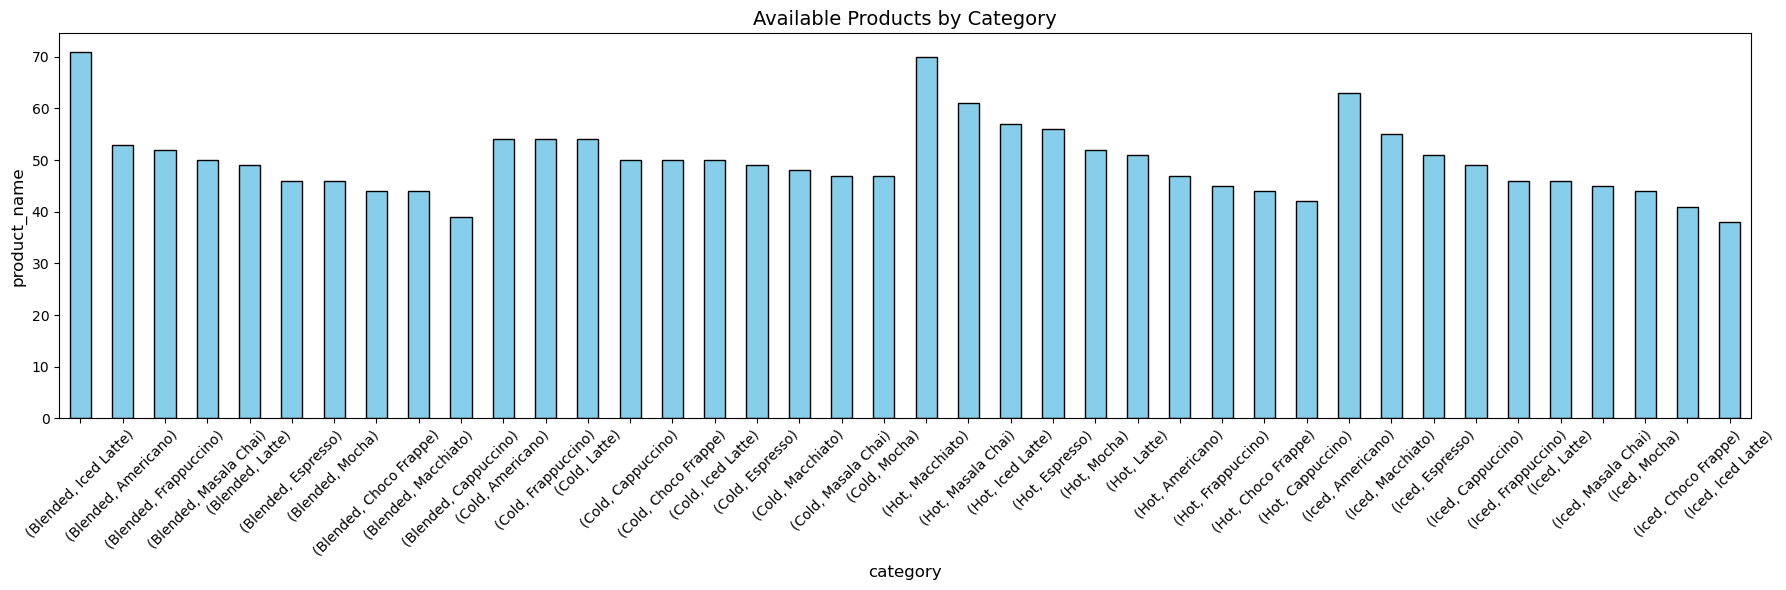

In [90]:
category_counts = data.groupby("category")["product_name"].value_counts()
plt.figure(figsize=(18, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Available Products by Category", fontsize=14)
plt.xlabel("category", fontsize=12)
plt.ylabel("product_name", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2 What is the average rating for each category?

In [91]:
data.groupby("category")["rating"].mean()

category
Blended    3.001012
Cold       3.101988
Hot        2.948571
Iced       3.016527
Name: rating, dtype: float64

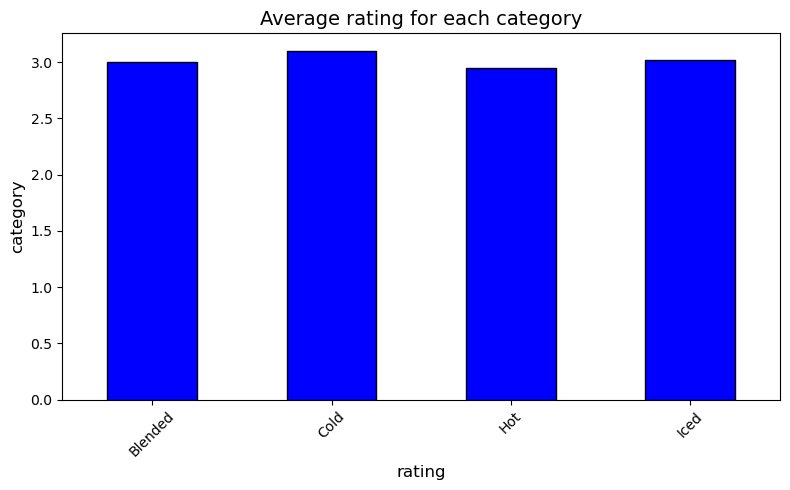

In [92]:
avg = data.groupby("category")["rating"].mean()
plt.figure(figsize=(8, 5))
avg.plot(kind= 'bar', color='blue', edgecolor='black')
plt.title("Average rating for each category", fontsize=14)
plt.xlabel("rating", fontsize=12)
plt.ylabel("category", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. What is the highest and lowest price in the dataset?

In [93]:
data["price"].max()


499.88

In [94]:
data["price"].min()

50.43

## 4. Which products have the highest quantity in stock?

In [95]:
data["quantity"].max()

200

## 5. Which products have the lowest quantity in stock?

In [96]:
data["quantity"].min()

10

## 6. Which products have the highest and lowest ratings?

In [97]:
data["rating"].max()

5.0

In [98]:
data["rating"].min()

1.0

## 7.What is the average calorie count for each size?

In [99]:
data.groupby("category")["calories"].mean()

category
Blended    300.615385
Cold       302.157058
Hot        295.293333
Iced       305.546025
Name: calories, dtype: float64

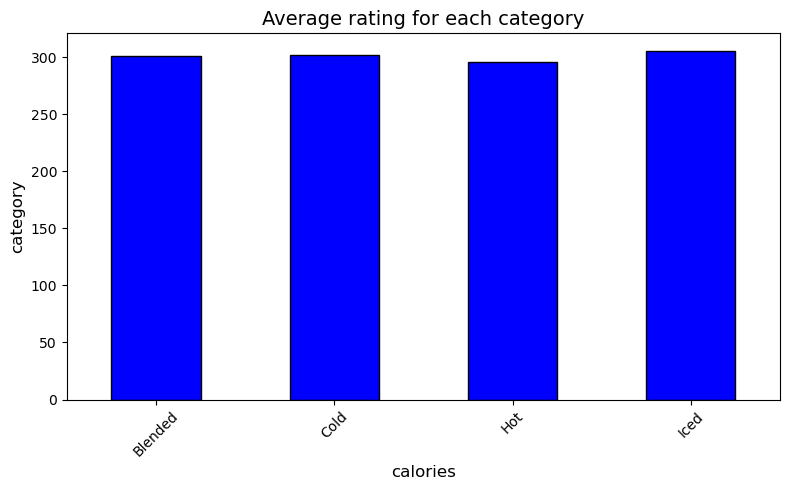

In [100]:
avg = data.groupby("category")["calories"].mean()
plt.figure(figsize=(8, 5))
avg.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Average rating for each category", fontsize=14)
plt.xlabel("calories", fontsize=12)
plt.ylabel("category", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
mycursor.execute('select * from customer')

output = mycursor.fetchall()

for x in output:
    print(x)

(1, 'CUST00001', 'Satya Narayana', 2899771429.0, 'Espresso', 49.33, 'Latte', 'Not as expected.', 'aradhyabhatia@gmail.com', 364)
(2, 'CUST00002', 'Krishna Veni', 917352000000.0, 'Frappe', 69.52, 'Cappuccino', 'Average experience.', 'zaina00@gmail.com', 137)
(3, 'CUST00003', 'Bhanu Prakash', 789187935.0, 'Cappuccino', 75.83, 'Cold Brew', 'Great taste!', 'kuruvillayakshit@hotmail.com', 32)
(4, 'CUST00004', 'Kiran Kumar', 2898538985.0, 'Frappe', 66.29, 'Americano', 'Perfect brew.', 'nakulroy@gmail.com', 298)
(5, 'CUST00005', 'Uma Maheswari', 6282932497.0, 'Filter Coffee', 89.68, 'Frappe', 'Loved it!', 'sampathjayesh@gmail.com', 278)
(6, 'CUST00006', 'Rajesh Babu', 7866434165.0, 'Cold Brew', 31.81, 'Filter Coffee', 'Average experience.', 'abalay@sampath.net', 239)
(7, 'CUST00007', 'Suresh Reddy', 912593000000.0, 'Cold Brew', 17.07, 'Mocha', 'Great taste!', 'yakshit27@hotmail.com', 268)
(8, 'CUST00008', 'Suresh Reddy', 910469000000.0, 'Frappe', 3.93, 'Cold Brew', 'Not as expected.', 'nirvaa

In [60]:
query = "select * from customer"
data = pd.read_sql(query, db)

In [62]:
data.head(10)

,id,customer_id,customer_name,customer_phonenumber,order_,tips,product,feedback,email,loyalty_points
0,1,CUST00001,Satya Narayana,2.899771e+09,Espresso,49.33,Latte,Not as expected.,aradhyabhatia@gmail.com,364
1,2,CUST00002,Krishna Veni,9.173520e+11,Frappe,69.52,Cappuccino,Average experience.,zaina00@gmail.com,137
2,3,CUST00003,Bhanu Prakash,7.891879e+08,Cappuccino,75.83,Cold Brew,Great taste!,kuruvillayakshit@hotmail.com,32
3,4,CUST00004,Kiran Kumar,2.898539e+09,Frappe,66.29,Americano,Perfect brew.,nakulroy@gmail.com,298
4,5,CUST00005,Uma Maheswari,6.282932e+09,Filter Coffee,89.68,Frappe,Loved it!,sampathjayesh@gmail.com,278
5,6,CUST00006,Rajesh Babu,7.866434e+09,Cold Brew,31.81,Filter Coffee,Average experience.,abalay@sampath.net,239
6,7,CUST00007,Suresh Reddy,9.125930e+11,Cold Brew,17.07,Mocha,Great taste!,yakshit27@hotmail.com,268
7,8,CUST00008,Suresh Reddy,9.104690e+11,Frappe,3.93,Cold Brew,Not as expected.,nirvaan06@gmail.com,473
8,9,CUST00009,Rajesh Babu,5.608812e+09,Filter Coffee,67.73,Mocha,Too sweet.,oranganathan@hotmail.com,146
9,10,CUST00010,Bhanu Prakash,9.171000e+11,Mocha,81.35,Mocha,Too sweet.,dishani13@apte.net,357


## 1.Which customers have the highest loyalty points?


In [68]:
data[["customer_id", "customer_name", "loyalty_points"]].nlargest(10, "loyalty_points")

,customer_id,customer_name,loyalty_points
1704,CUST01705,Krishna Veni,500
109,CUST00110,Sai Prasad,499
150,CUST00151,Kiran Kumar,499
1858,CUST01859,Nagarjuna Reddy,499
1932,CUST01933,Harsha Vardhan,499
407,CUST00408,Bhanu Prakash,498
834,CUST00835,Ravi Kumar,498
1186,CUST01187,Venkatesh Goud,498
1441,CUST01442,Manohar Rao,498
275,CUST00276,Manohar Rao,497


In [74]:
data[["customer_id", "customer_name", "loyalty_points"]].loc[data["loyalty_points"]].idxmax()

customer_id       500
customer_name     137
loyalty_points    109
dtype: int64

<Figure size 1000x800 with 0 Axes>

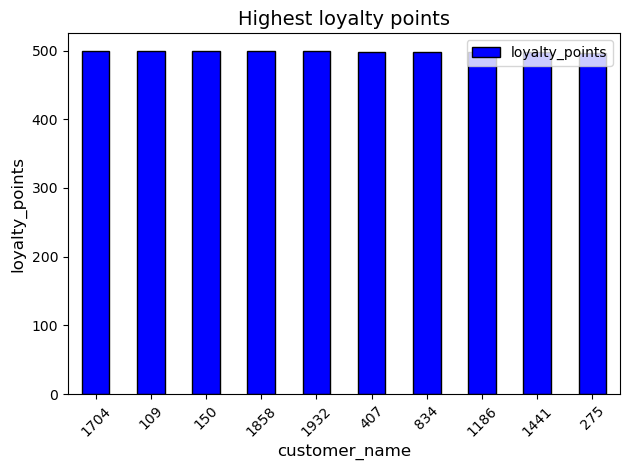

In [72]:
avg = data[["customer_id", "customer_name", "loyalty_points"]].nlargest(10, "loyalty_points")
plt.figure(figsize=(10, 8))
avg.plot(kind= 'bar', color='blue', edgecolor='black')
plt.title("Highest loyalty points", fontsize=14)
plt.xlabel("customer_name", fontsize=12)
plt.ylabel("loyalty_points", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Which customers gave the highest tips?

In [75]:
data[["customer_id", "customer_name", "tips"]].nlargest(10, "tips")

,customer_id,customer_name,tips
78,CUST00079,Gopal Krishna,99.95
432,CUST00433,Lakshmi Narayana,99.76
279,CUST00280,Uma Maheswari,99.72
843,CUST00844,Sridevi,99.54
1441,CUST01442,Manohar Rao,99.51
655,CUST00656,Krishna Veni,99.48
1681,CUST01682,Satya Narayana,99.36
1260,CUST01261,Nagarjuna Reddy,99.31
1589,CUST01590,Sai Prasad,99.29
1392,CUST01393,Sridevi,99.11


<Figure size 1000x800 with 0 Axes>

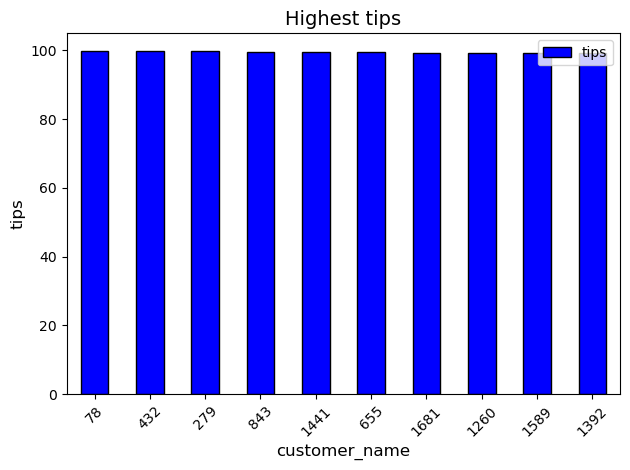

In [76]:
avg = data[["customer_id", "customer_name", "tips"]].nlargest(10, "tips")
plt.figure(figsize=(10, 8))
avg.plot(kind= 'bar', color='blue', edgecolor='black')
plt.title("Highest tips", fontsize=14)
plt.xlabel("customer_name", fontsize=12)
plt.ylabel("tips", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [102]:
mycursor.execute('select * from online_order')

output = mycursor.fetchall()

for x in output:
    print(x)

('CUST00001', 'ORD00001', 'Delivery', Decimal('4528.15'))
('CUST00002', 'ORD00002', 'Delivery', Decimal('3288.34'))
('CUST00003', 'ORD00003', 'Takeaway', Decimal('2041.30'))
('CUST00004', 'ORD00004', 'Delivery', Decimal('3081.88'))
('CUST00005', 'ORD00005', 'Takeaway', Decimal('4670.02'))
('CUST00006', 'ORD00006', 'Delivery', Decimal('1039.93'))
('CUST00007', 'ORD00007', 'Delivery', Decimal('4105.76'))
('CUST00008', 'ORD00008', 'Delivery', Decimal('947.90'))
('CUST00009', 'ORD00009', 'Delivery', Decimal('4047.56'))
('CUST00010', 'ORD00010', 'Takeaway', Decimal('4281.94'))
('CUST00011', 'ORD00011', 'Delivery', Decimal('3067.96'))
('CUST00012', 'ORD00012', 'Delivery', Decimal('1862.12'))
('CUST00013', 'ORD00013', 'Delivery', Decimal('653.30'))
('CUST00014', 'ORD00014', 'Delivery', Decimal('4246.35'))
('CUST00015', 'ORD00015', 'Takeaway', Decimal('1402.71'))
('CUST00016', 'ORD00016', 'Takeaway', Decimal('218.11'))
('CUST00017', 'ORD00017', 'Delivery', Decimal('1392.02'))
('CUST00018', 'OR

In [103]:
query = "select * from online_order"
data = pd.read_sql(query, db)

In [106]:
data.head(11)

,customer_id,order_id,type_of_order,budget
0,CUST00001,ORD00001,Delivery,4528.15
1,CUST00002,ORD00002,Delivery,3288.34
2,CUST00003,ORD00003,Takeaway,2041.30
3,CUST00004,ORD00004,Delivery,3081.88
4,CUST00005,ORD00005,Takeaway,4670.02
5,CUST00006,ORD00006,Delivery,1039.93
6,CUST00007,ORD00007,Delivery,4105.76
7,CUST00008,ORD00008,Delivery,947.90
8,CUST00009,ORD00009,Delivery,4047.56
9,CUST00010,ORD00010,Takeaway,4281.94


## 1.What is the average budget for all orders?

In [107]:
data.groupby("type_of_order")["budget"].mean()

type_of_order
Delivery    2539.089244
Takeaway    2501.715908
Name: budget, dtype: float64

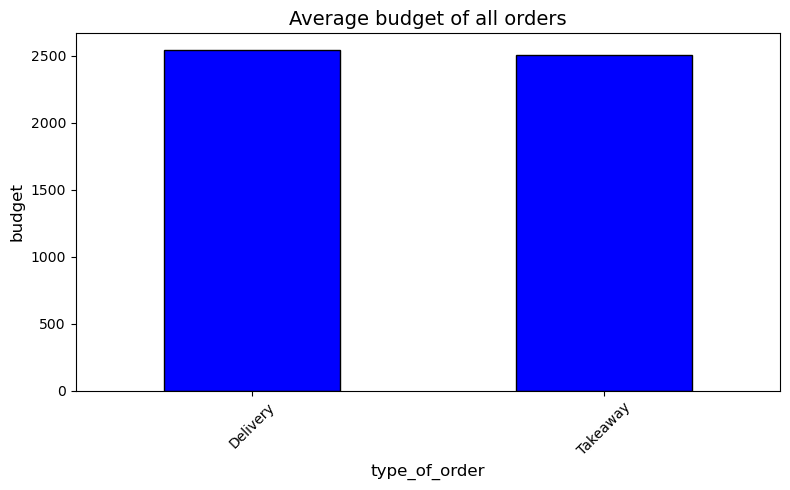

In [108]:
avg = data.groupby("type_of_order")["budget"].mean()
plt.figure(figsize=(8, 5))
avg.plot(kind= 'bar', color='blue', edgecolor='black')
plt.title("Average budget of all orders", fontsize=14)
plt.xlabel("type_of_order", fontsize=12)
plt.ylabel("budget", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.Which order has the highest budget?

In [109]:
data["budget"].max()

4998.34

## 3. Which order has the lowest budget?

In [110]:
data["budget"].min()

104.01